In [1]:
#import math and data manipulation modules
import pandas as pd
import numpy as np
import scipy.stats as stats

# import viz modules
import matplotlib.pyplot as plt
import seaborn as sns

# import classification models
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# import custom modules
import evaluate, explore, prepare

import warnings
warnings.filterwarnings("ignore")

# Predicting Heart Failure with Clinical Data

## Planning
    "“A goal without a plan is just a wish.” ― Antoine de Saint-Exupéry
### Goals:
    - Find drivers for death in a heart failure event
    - Build a classification model to predict death
### Methods:
    - Acquire data
    - Inspect and prep data
    - Conduct domain research 
    - Conduct thourough statistical analysis
    - Create visuals where necessary 
    - Scale data for model
    - Fit and validate a few models
    - Evaluate best model against test data
    - Create a prediction
    - Summarize results and future directions

## Acquire
    “It is a capital mistake to theorize before one has data.” — Sherlock Holmes

In [2]:
heart_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
heart_df.shape

(299, 13)

In [5]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


### Acquire Takeaways:
- The dataset is already pretty cleaned up for us, indicated by a few things:
    1. The absence of nulls in the data set
    2. Platelets having a floating point number indicate that they were filled with an aggregate of some kind, since platelets are not measured in anything other than whole numbers
    3. Columns already have appropriate data types

- To Do:
    - will need to scale data after the split
    - Explore potential feature engineering by binning platelet counts, ejection_fraction, or sodium

## Prepare
    “By failing to prepare, you are preparing to fail.”― Benjamin Franklin
Since the dataset is already pretty clean, I will just rename my target and change the platelets to an int

In [7]:
heart_df = heart_df.rename(columns = {'DEATH_EVENT' : 'died'})

In [8]:
heart_df.platelets = heart_df.platelets.astype(int)

In [9]:
heart_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,died
0,75.0,0,582,0,20,1,265000,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000,1.4,140,1,1,280,0


Now we have a data set with reasonable dtypes and squeaky clean

## Explore
      “The goal is to turn data into information and information into insight.” – Carly Fiorina, 


Lets make some hypothesis to guide exploration:
   1. Patients are more likely to die with a high platelet count
   2. Ejection fraction is how much blood volume is pushed out of the heart when it beats. Low ejection fraction is known to be an indicator of heart issues. Is a low ejection fraction predicative of death?
   3. Smoking is a known risk factor for cardiovascular disease. Is it also predicative of death?

### Univariate

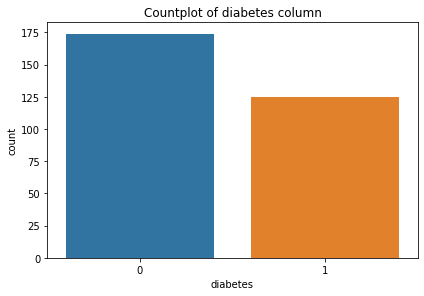

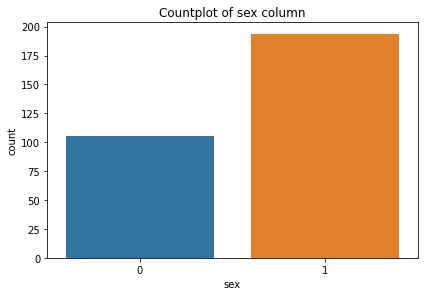

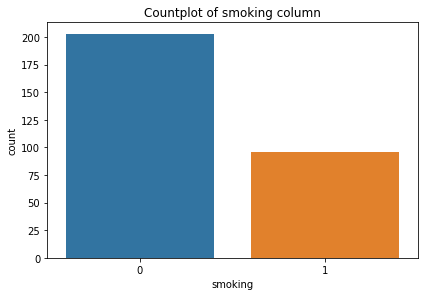

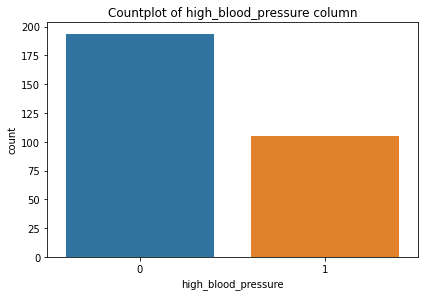

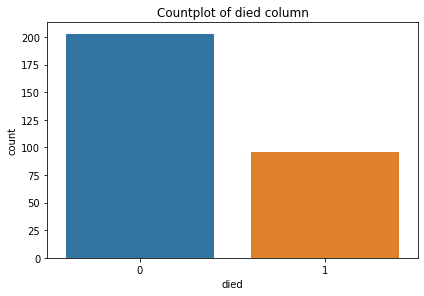

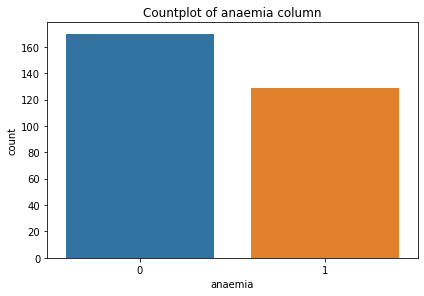

In [10]:
# lets check out some countplots of the boolean variables
cat_var = ['diabetes','sex','smoking','high_blood_pressure','died','anaemia']
for i in heart_df[cat_var]:
    sns.countplot(x = i, data = heart_df)
    plt.tight_layout()
    plt.title(label = (f'Countplot of {i} column'))
    plt.show()

#### Qualitative Univariate Takeaways:
   - Data is made up mostly of men
   - Most people survived their cardiovascular event
   - Data is mostly non-smokers
   - Non-diabetics outnumber diabetics but only slightly

In [11]:
cols = list(heart_df.columns)
cols

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'died']

In [12]:
quant_vars = np.setdiff1d(cols, cat_var)
quant_vars

array(['age', 'creatinine_phosphokinase', 'ejection_fraction',
       'platelets', 'serum_creatinine', 'serum_sodium', 'time'],
      dtype='<U24')

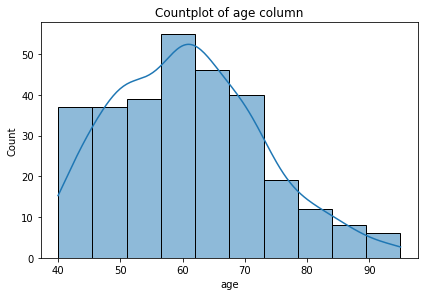

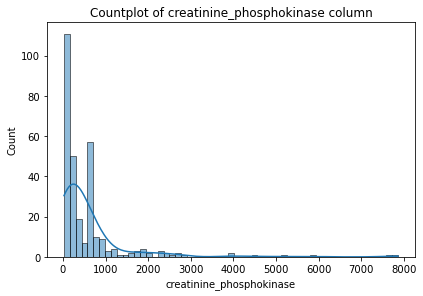

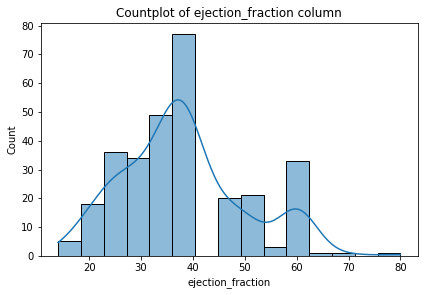

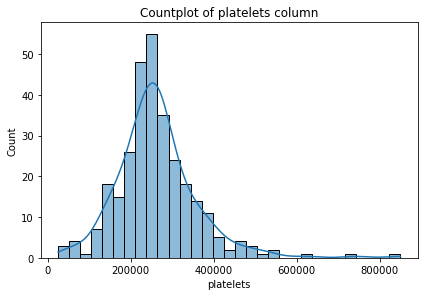

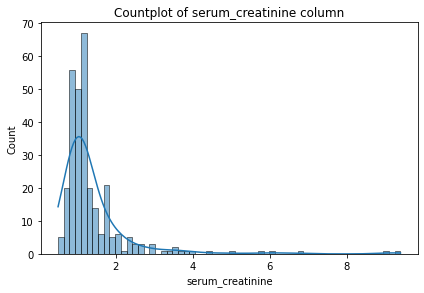

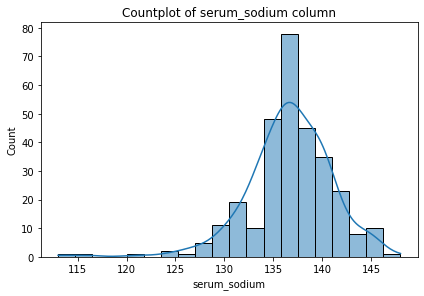

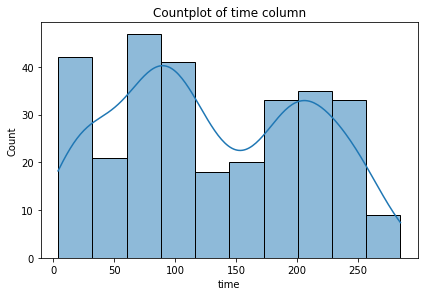

In [13]:
for i in heart_df[quant_vars]:
    sns.histplot(x = i, data = heart_df, kde = True)
    plt.tight_layout()
    plt.title(label = (f'Countplot of {i} column'))
    plt.show()

#### Quantitative Univariate Takeaway:
   - For the most part, all the data is normally distributed, except for time and ejection fraction.
       - Should make a visualization of those two variables against the target to see if the two peaks are seperated by death status 
   - The other datasets have a bell like curve but they have long high value tails. I will probably use a test for normalty and then consider what to do about outliers. Potentially scale using a robust scaler
   - I would like to avoid dropping outliers because my dataset is small and also there is a reality that medical outliers do happen. 

### Bivariate 

In [14]:
# I need to split my data before I do multivariate analysis
train, validate, test = evaluate.train_validate_test_split(heart_df, 'died')

diabetes 
_____________________

       chi2  p-value  degrees of freedom
0  0.001221  0.97212                   1

observed:
 died        0   1  All
diabetes              
0          63  31   94
1          50  23   73
All       113  54  167

expected:
           0         1
0  63.60479  30.39521
1  49.39521  23.60479


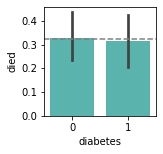


_____________________

sex 
_____________________

       chi2   p-value  degrees of freedom
0  0.646625  0.421322                   1

observed:
 died    0   1  All
sex               
0      40  15   55
1      73  39  112
All   113  54  167

expected:
            0          1
0  37.215569  17.784431
1  75.784431  36.215569


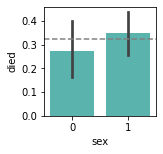


_____________________

smoking 
_____________________

       chi2   p-value  degrees of freedom
0  0.007819  0.929537                   1

observed:
 died       0   1  All
smoking              
0         74  35  109
1         39  19   58
All      113  54  167

expected:
            0          1
0  73.754491  35.245509
1  39.245509  18.754491


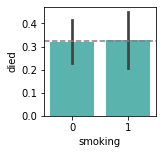


_____________________

high_blood_pressure 
_____________________

       chi2   p-value  degrees of freedom
0  1.141642  0.285306                   1

observed:
 died                   0   1  All
high_blood_pressure              
0                     76  31  107
1                     37  23   60
All                  113  54  167

expected:
            0          1
0  72.401198  34.598802
1  40.598802  19.401198


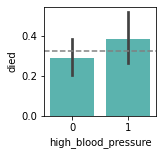


_____________________

died 
_____________________

         chi2       p-value  degrees of freedom
0  162.460803  3.281085e-37                   1

observed:
 died    0   1  All
died              
0     113   0  113
1       0  54   54
All   113  54  167

expected:
            0          1
0  76.461078  36.538922
1  36.538922  17.461078


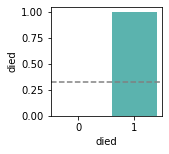


_____________________

anaemia 
_____________________

       chi2   p-value  degrees of freedom
0  0.723553  0.394981                   1

observed:
 died       0   1  All
anaemia              
0         68  28   96
1         45  26   71
All      113  54  167

expected:
            0          1
0  64.958084  31.041916
1  48.041916  22.958084


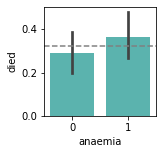


_____________________

age 
____________________



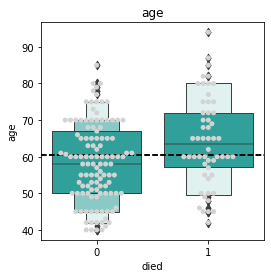

      count       mean        std   min    25%   50%   75%   max
died                                                            
0     113.0  58.545726  10.842402  40.0  50.00  58.0  67.0  85.0
1      54.0  64.296296  12.209847  42.0  57.25  63.5  72.0  94.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2268.5, pvalue=0.007344418425208129)

____________________

creatinine_phosphokinase 
____________________



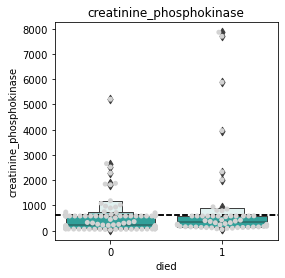

      count        mean          std   min     25%    50%    75%     max
died                                                                    
0     113.0  475.460177   674.047304  30.0   96.00  224.0  582.0  5209.0
1      54.0  865.851852  1677.336955  47.0  150.25  341.0  582.0  7861.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2553.5, pvalue=0.08792470528068377)

____________________

ejection_fraction 
____________________



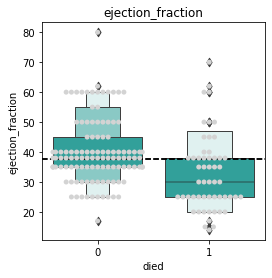

      count       mean        std   min   25%   50%   75%   max
died                                                           
0     113.0  40.026549  10.767395  17.0  35.0  38.0  45.0  80.0
1      54.0  32.814815  12.744328  14.0  25.0  30.0  38.0  70.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=4204.5, pvalue=7.029548880259254e-05)

____________________

platelets 
____________________



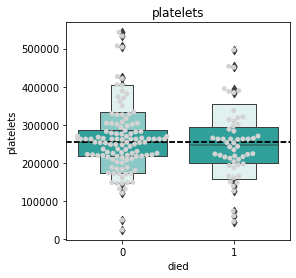

      count           mean           std      min       25%       50%  \
died                                                                    
0     113.0  259310.070796  85714.031375  25100.0  218000.0  255000.0   
1      54.0  250681.296296  92761.320413  47000.0  199500.0  248500.0   

           75%       max  
died                      
0     286000.0  543000.0  
1     295000.0  497000.0   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=3242.0, pvalue=0.5143509458240223)

____________________

serum_creatinine 
____________________



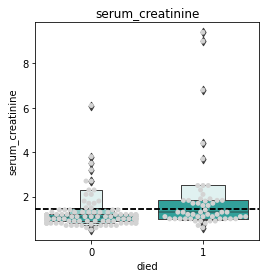

      count      mean       std  min  25%  50%   75%  max
died                                                     
0     113.0  1.231593  0.715101  0.5  0.9  1.1  1.20  6.1
1      54.0  1.859630  1.765292  0.6  1.0  1.3  1.83  9.4 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=2022.5, pvalue=0.0004096623271974079)

____________________

serum_sodium 
____________________



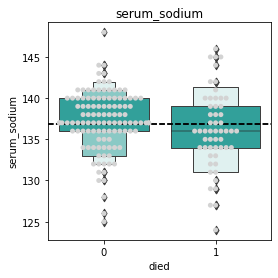

      count        mean       std    min    25%    50%    75%    max
died                                                                
0     113.0  137.265487  3.649897  125.0  136.0  137.0  140.0  148.0
1      54.0  136.148148  4.751990  124.0  134.0  136.0  139.0  146.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=3631.5, pvalue=0.046203347298062955)

____________________

time 
____________________



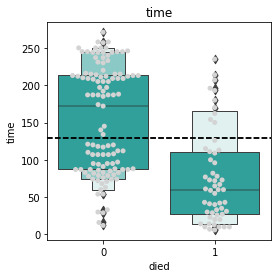

      count        mean        std   min   25%    50%    75%    max
died                                                               
0     113.0  154.017699  71.918106  12.0  87.0  172.0  214.0  271.0
1      54.0   75.740741  62.504697   6.0  27.5   60.0  110.5  235.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=4925.5, pvalue=1.4336983922711e-10)

____________________



In [15]:
explore.bivariate(train, 'died', cat_var, quant_vars)

<AxesSubplot:xlabel='ejection_fraction', ylabel='age'>

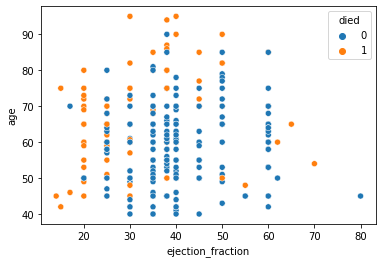

In [16]:
sns.scatterplot(data = heart_df, x = 'ejection_fraction', y = 'age', hue = 'died')

#### Quantitative Bivariate Exploration Takeaways:
   - The only significant statistical results are ```serum_sodium```, ```serum_creatine```, ```ejection_fraction```, ```age```, and ```time```. 
       - I will not include time as a feature at this time because it is the days between the initial event and a follow-up visit. From my research into the dataset, the proper way to analyze this in a meaningful way is to perform a survival analysis on it. For the time being, I will wait to implement time as a feature. 
    - ```ejection_fraction``` makes sense. Weaker or damaged hearts will not be able to evacuate the atria as efficiently. This leads to blood potentially clotting, oxygenation issues with the tissue, and increases stress on the heart.
    - ```age``` is also another one that makes sense, as older people tend to not recover from inuries as well. I will want to bin this to see if it helps the model. 
    - ```serum_sodium``` and ```serum_creatine``` are two other known biomarkers. 

#### Qualitative Bivariate Exploration Takeaways:
   - None of the categorical variables had significant results. The lowest p-value was for ```high_blood_pressure```. These results are surprising, I would have assumed a higher level of significance for at least smokers and high blood pressure. Perhaps I could feature engineer another categorical by binning some values. 

### Multivariate

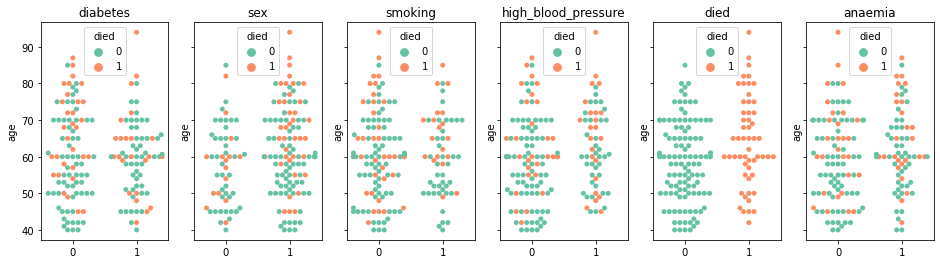

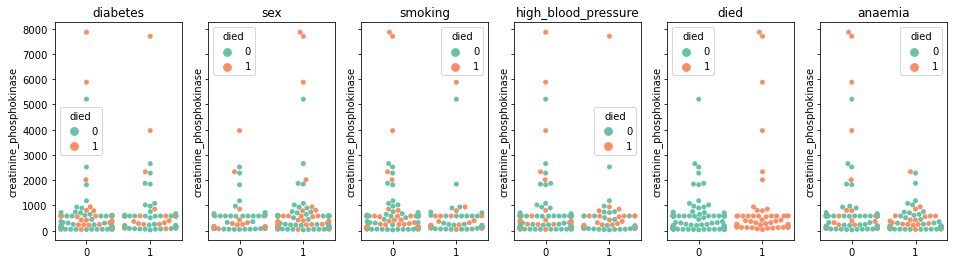

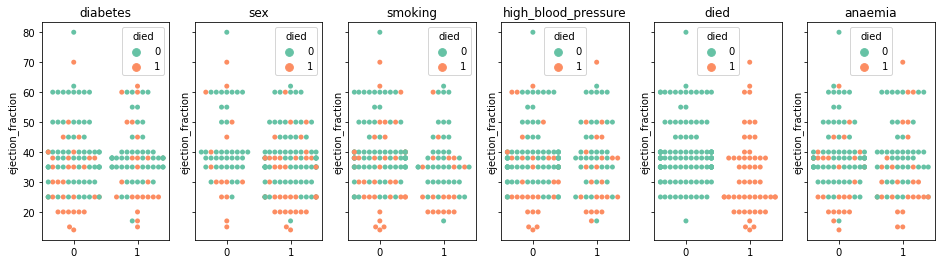

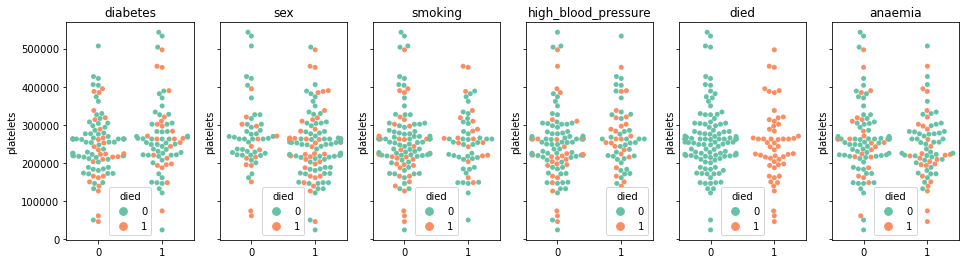

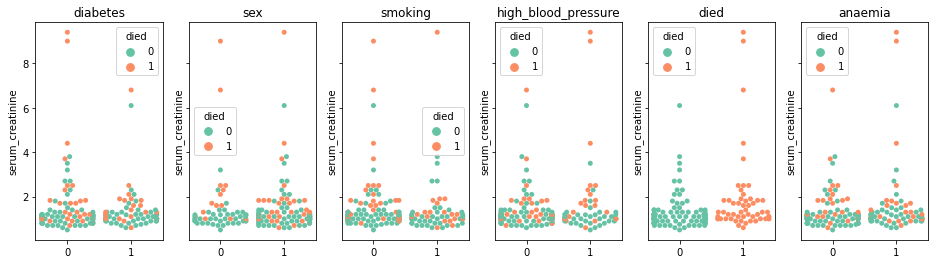

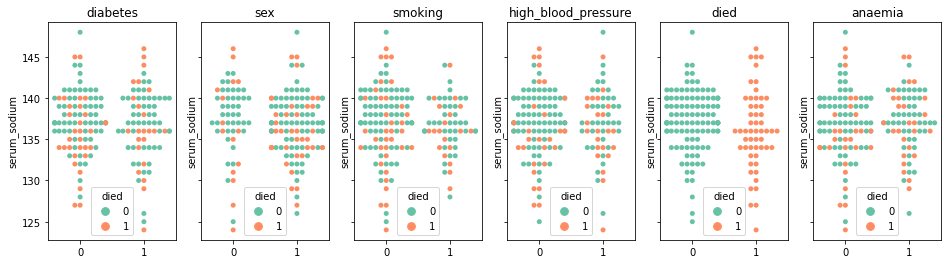

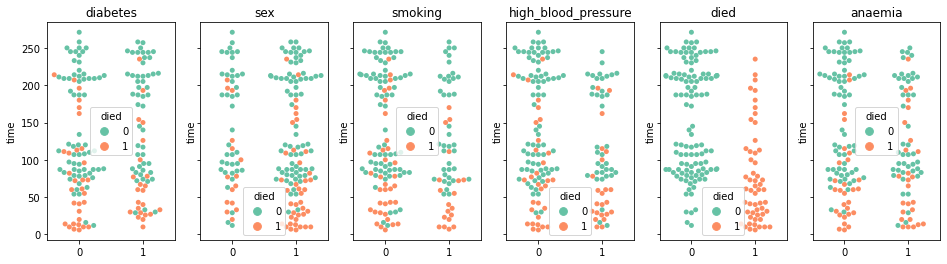

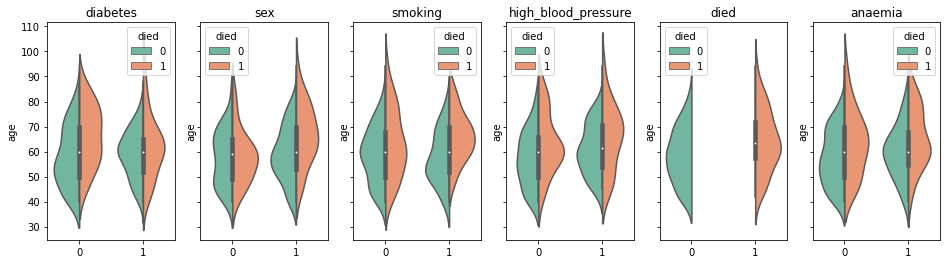

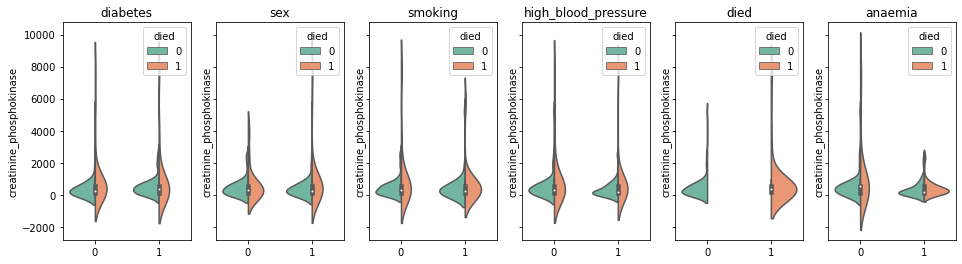

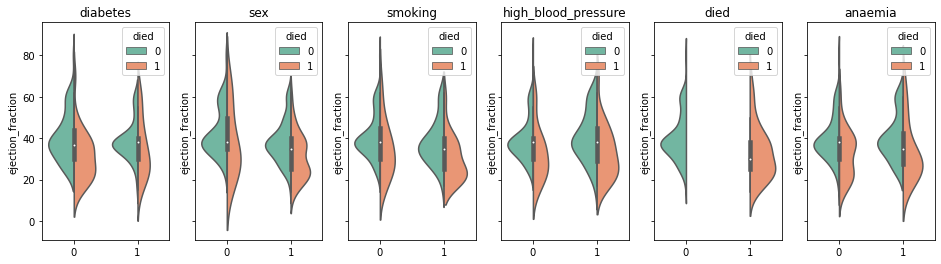

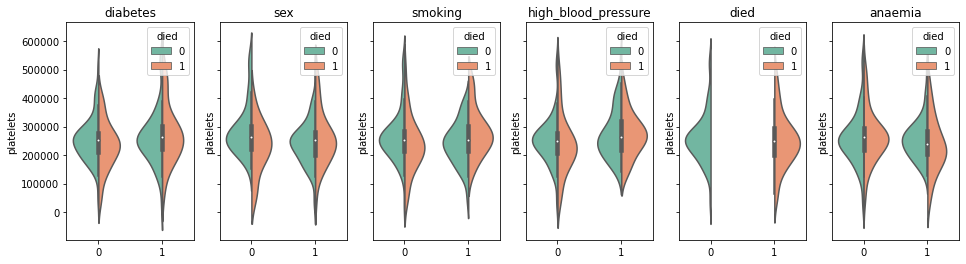

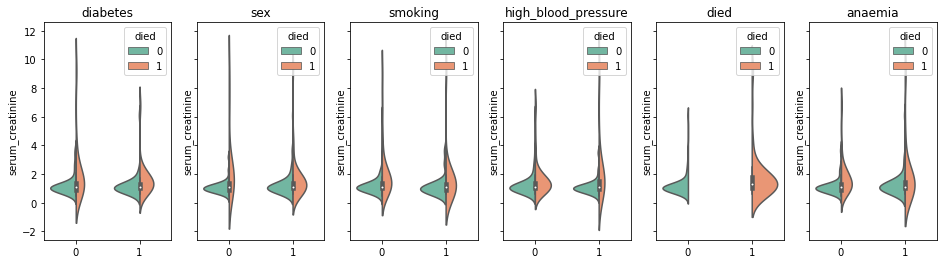

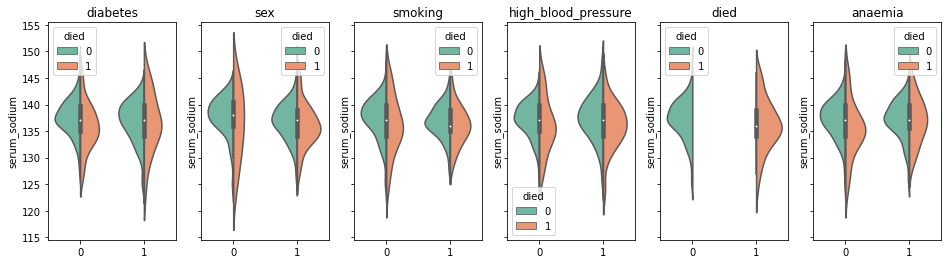

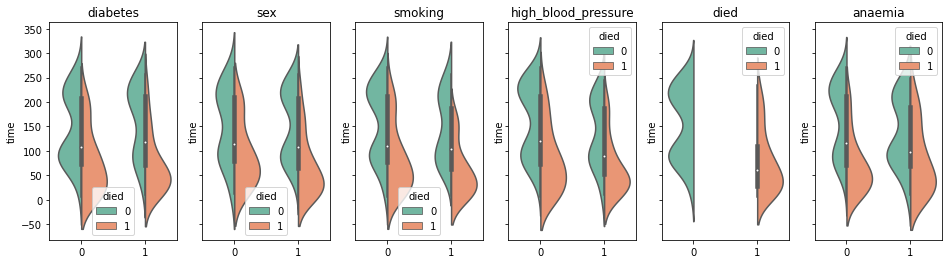

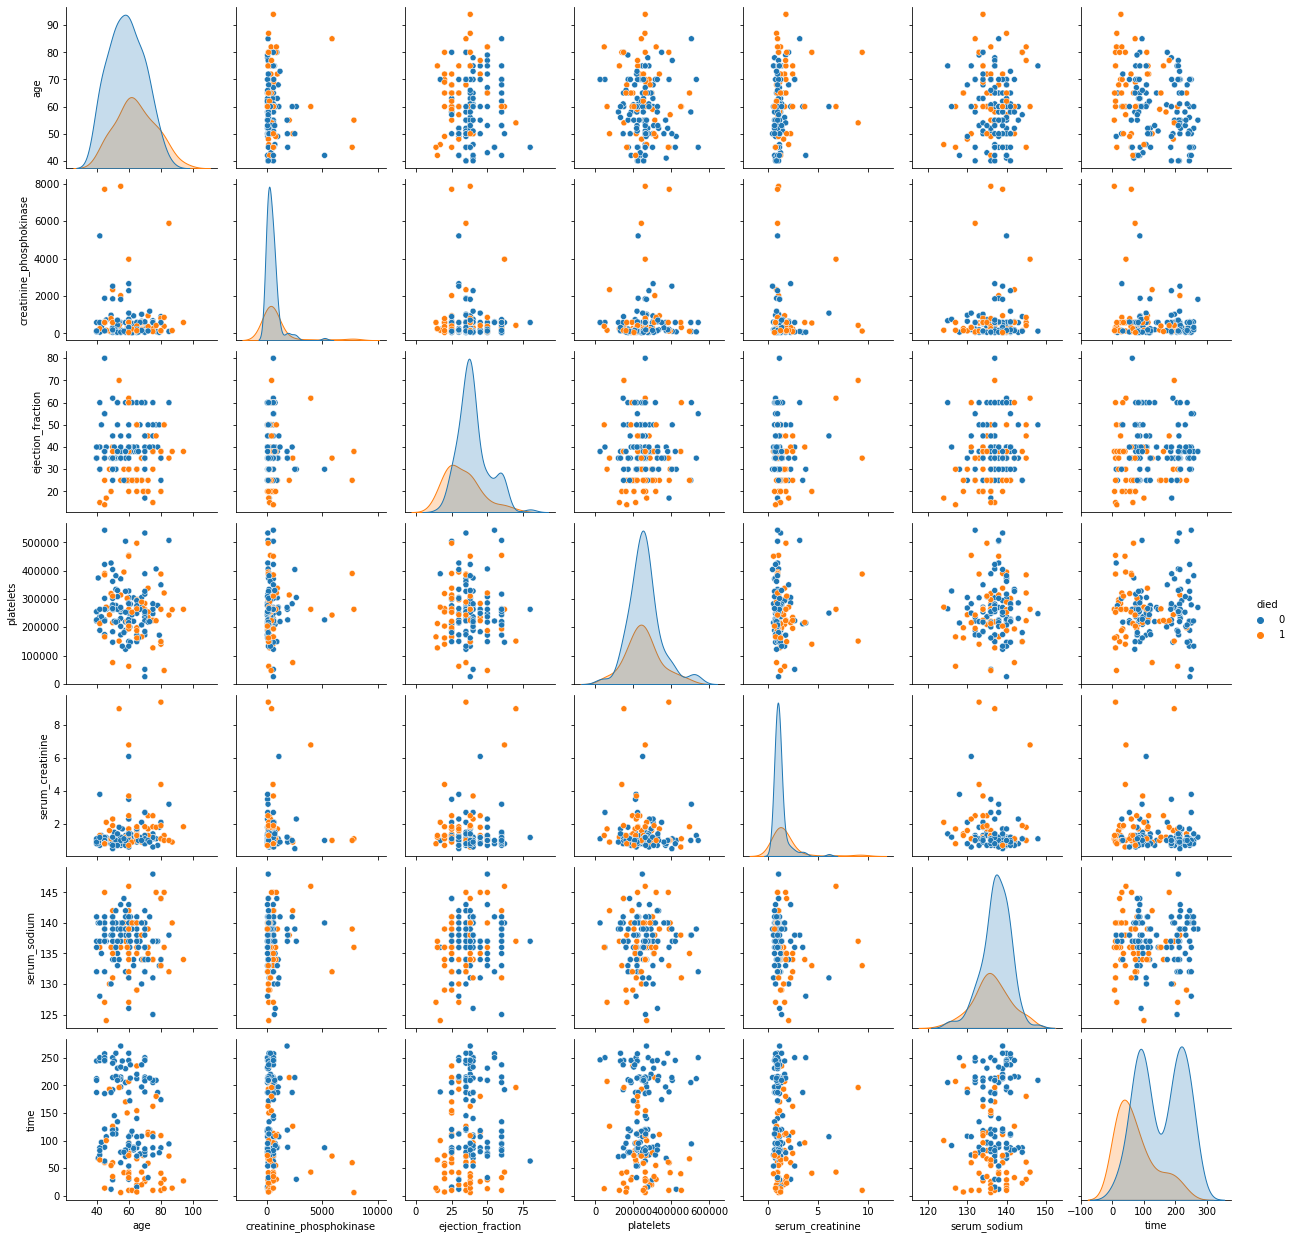

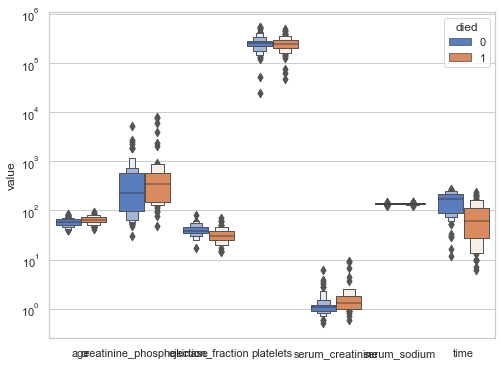

In [17]:
# lets do a multivariate 
explore.multivariate(train, 'died', cat_var, quant_vars)

<AxesSubplot:xlabel='age', ylabel='ejection_fraction'>

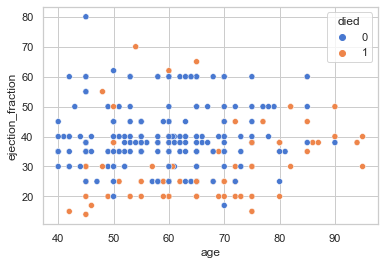

In [18]:
sns.scatterplot(data = heart_df, x = 'age', y = 'ejection_fraction', hue = 'died')

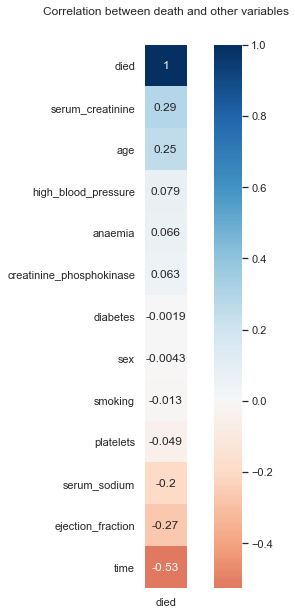

In [19]:
died_heat = pd.DataFrame(heart_df.corr()['died'])
plt.figure(figsize = [10,10])
sns.heatmap(died_heat.sort_values(by = 'died',ascending = False), center = 0, cmap='RdBu', annot=True, square = True)
plt.title('Correlation between death and other variables', pad = 30)
plt.show()

#### Multivariate takeaways:
   - I don't see any real clustering happening in the swarm plots, but men seemed to die more frequently at higher ages
   - You can see that extremely low ejection fractions pretty much are a deathspell. Further reason to bin that and maybe try to use it as a categorical variable. I could also try clustering it and seeing how strong it is.
   - The heatmap shows our top variables, further supporting what we learned from the statistical analysis

## Modeling
     “We classify things for the purpose of doing something to them. Any classification which does not assist manipulation is worse than useless.” ― Randolph Bourne.

### Next Steps
- I will use ```ejection_fraction```, ```age```, ```serum_sodium```, and ```serum_creatinine``` as my initial features
- lets do some quick QA to make sure the train, validate, and test splits are adequate in size
- scale the data in an adequate fashion
- fit a KNN, decision tree, and random forest to the data
- evaluate for best model
- Repeat with engineered features or modified hyper parameters

In [20]:
train.shape

(167, 13)

In [21]:
validate.shape

(72, 13)

In [22]:
test.shape

(60, 13)

In [23]:
train['baseline'] = 0
baseline_accuracy = (train.baseline == train.died).mean()
print(f'Baseline accuracy is {baseline_accuracy:.2%}')

Baseline accuracy is 67.66%


In [24]:
y_col = 'died'
X_cols = ['ejection_fraction','age','serum_sodium','serum_creatinine']
X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [25]:
X_train_scaled = prepare.minmax_scale(X_train, X_train)
X_validate_scaled = prepare.minmax_scale(X_validate, X_train)
X_test_scaled = prepare.minmax_scale(X_test, X_train)

In [26]:
X_train_scaled

,ejection_fraction,age,serum_sodium,serum_creatinine
0,0.469697,0.555556,0.500000,0.089888
1,0.727273,0.185185,0.666667,0.033708
2,0.166667,0.333333,0.333333,0.089888
3,0.166667,0.462963,0.708333,0.067416
4,0.696970,0.648148,0.041667,0.101124
...,...,...,...,...
162,0.363636,0.185185,0.458333,0.157303
163,0.363636,0.240741,0.541667,0.101124
164,0.090909,0.370370,0.625000,0.022472
165,0.000000,0.092593,0.125000,0.033708


### K - Nearest Neighbors

In [42]:
for k in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    taccuracy = knn.score(X_train, y_train)
    vaccuracy = knn.score(X_validate, y_validate)
    print(f'{k:2d}: Train accuracy = {taccuracy:.2%}, Validate accuracy = {vaccuracy:.2%}')

 1: Train accuracy = 100.00%, Validate accuracy = 68.06%
 2: Train accuracy = 80.24%, Validate accuracy = 75.00%
 3: Train accuracy = 80.24%, Validate accuracy = 73.61%
 4: Train accuracy = 76.65%, Validate accuracy = 75.00%
 5: Train accuracy = 78.44%, Validate accuracy = 72.22%
 6: Train accuracy = 77.25%, Validate accuracy = 72.22%
 7: Train accuracy = 77.84%, Validate accuracy = 75.00%
 8: Train accuracy = 77.84%, Validate accuracy = 73.61%
 9: Train accuracy = 76.65%, Validate accuracy = 75.00%
10: Train accuracy = 76.65%, Validate accuracy = 73.61%
11: Train accuracy = 76.65%, Validate accuracy = 76.39%
12: Train accuracy = 76.65%, Validate accuracy = 76.39%
13: Train accuracy = 75.45%, Validate accuracy = 77.78%
14: Train accuracy = 76.05%, Validate accuracy = 73.61%
15: Train accuracy = 76.05%, Validate accuracy = 72.22%
16: Train accuracy = 75.45%, Validate accuracy = 70.83%
17: Train accuracy = 76.65%, Validate accuracy = 75.00%
18: Train accuracy = 75.45%, Validate accuracy 

A quick test to see what k I should use shows that a k of 4 has the highest validate accuracy while not being too overfit

In [28]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=4)

In [29]:
evaluate.run_metrics(X_train, y_train, knn, 'train')

train data set accuracy score: 32.34%
train data set precision score 32.34%
train data set recall score: 100.00%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       1.00      0.00      0.00       113
           1       0.32      1.00      0.49        54

    accuracy                           0.32       167
   macro avg       0.66      0.50      0.24       167
weighted avg       0.78      0.32      0.16       167

-------------------------------

confusion matrix
[[  0 113]
 [  0  54]]

train data set model metrics
---------------------------------
True positive rate for the model is 100.00%
False positive rate for the model is  100.00%
True negative rate for the model is 0.00%
False negative rate for the model is 0.00%



In [30]:
confusion_matrix(y_train, knn.predict(X_train))

array([[  0, 113],
       [  0,  54]])

In [31]:
knn.score(X_test, y_test)

0.31666666666666665

In [37]:
evaluate.run_metrics(X_validate, y_validate, knn, 'train')

train data set accuracy score: 43.06%
train data set precision score 28.57%
train data set recall score: 52.17%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.63      0.39      0.48        49
           1       0.29      0.52      0.37        23

    accuracy                           0.43        72
   macro avg       0.46      0.45      0.43        72
weighted avg       0.52      0.43      0.45        72

-------------------------------

confusion matrix
[[19 30]
 [11 12]]

train data set model metrics
---------------------------------
True positive rate for the model is 52.17%
False positive rate for the model is  61.22%
True negative rate for the model is 38.78%
False negative rate for the model is 47.83%



In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 123)
X_train_scaled1, y_train1 = smote.fit_sample(X_train_scaled, y_train)

In [167]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled1, y_train1)

KNeighborsClassifier(n_neighbors=15)

In [168]:
evaluate.run_metrics(X_train_scaled1, y_train1, knn, 'train')

train data set accuracy score: 76.99%
train data set precision score 77.48%
train data set recall score: 76.11%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       113
           1       0.77      0.76      0.77       113

    accuracy                           0.77       226
   macro avg       0.77      0.77      0.77       226
weighted avg       0.77      0.77      0.77       226

-------------------------------

confusion matrix
[[88 25]
 [27 86]]

train data set model metrics
---------------------------------
True positive rate for the model is 76.11%
False positive rate for the model is  22.12%
True negative rate for the model is 77.88%
False negative rate for the model is 23.89%



In [169]:
evaluate.run_metrics(X_validate_scaled, y_validate, knn, 'validate')

validate data set accuracy score: 73.61%
validate data set precision score 56.67%
validate data set recall score: 73.91%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        49
           1       0.57      0.74      0.64        23

    accuracy                           0.74        72
   macro avg       0.71      0.74      0.72        72
weighted avg       0.76      0.74      0.74        72

-------------------------------

confusion matrix
[[36 13]
 [ 6 17]]

validate data set model metrics
---------------------------------
True positive rate for the model is 73.91%
False positive rate for the model is  26.53%
True negative rate for the model is 73.47%
False negative rate for the model is 26.09%



#### K-Nearest Neighbors Takeaway
- SMOTE helps dramatically with dealing with the class imbalance. 
- I want to maximize the recall score, because that essentially is showing my performance on identifying people that will have a heart event 
- beats baseline by almost 10%

### Decision Tree

In [170]:
X_train1, y_train1 = smote.fit_sample(X_train, y_train)

In [171]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train1, y_train1)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [172]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train1, y_train1)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))


Number of nodes in the last tree is: 1 with ccp_alpha: 0.09166666666666673


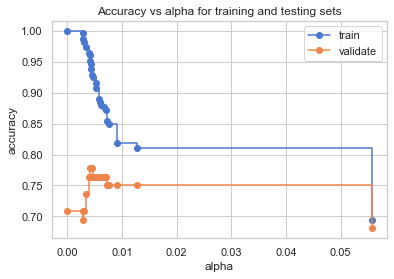

In [173]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [clf.score(X_train1, y_train1) for clf in clfs]
test_scores = [clf.score(X_validate, y_validate) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="validate",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [174]:
tree = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 16, ccp_alpha = .013)
tree.fit(X_train1, y_train1)

DecisionTreeClassifier(ccp_alpha=0.013, max_depth=3, min_samples_leaf=16)

In [175]:
evaluate.run_metrics(X_train1, y_train1, tree, 'train' )

train data set accuracy score: 77.88%
train data set precision score 74.80%
train data set recall score: 84.07%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.82      0.72      0.76       113
           1       0.75      0.84      0.79       113

    accuracy                           0.78       226
   macro avg       0.78      0.78      0.78       226
weighted avg       0.78      0.78      0.78       226

-------------------------------

confusion matrix
[[81 32]
 [18 95]]

train data set model metrics
---------------------------------
True positive rate for the model is 84.07%
False positive rate for the model is  28.32%
True negative rate for the model is 71.68%
False negative rate for the model is 15.93%



In [176]:
evaluate.run_metrics(X_validate, y_validate, tree, 'validate' )

validate data set accuracy score: 75.00%
validate data set precision score 59.26%
validate data set recall score: 69.57%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        49
           1       0.59      0.70      0.64        23

    accuracy                           0.75        72
   macro avg       0.72      0.74      0.72        72
weighted avg       0.76      0.75      0.75        72

-------------------------------

confusion matrix
[[38 11]
 [ 7 16]]

validate data set model metrics
---------------------------------
True positive rate for the model is 69.57%
False positive rate for the model is  22.45%
True negative rate for the model is 77.55%
False negative rate for the model is 30.43%



#### Decision Tree Takeaways
   - Using unscaled smoted data provides a rather overfit model. 
   - Changing max depth and minimum numbers of samples in the leaf helps cut down on being overfit.
   - Attempts at pre and post pruning helped with overfitting, but still too overfit compared to kmeans. 
   - an improvement over baseline by about 8 %

### Random Forest

In [177]:
rfc = RandomForestClassifier(random_state = 123,
                             max_depth = 3, 
                             min_samples_leaf = 16, 
                             ccp_alpha = .013,
                             class_weight = {0:.33, 1: .66})

In [178]:
rfc.fit(X_train1, y_train1)

RandomForestClassifier(ccp_alpha=0.013, class_weight={0: 0.33, 1: 0.66},
                       max_depth=3, min_samples_leaf=16, random_state=123)

In [179]:
evaluate.run_metrics(X_train1, y_train1, rfc, 'train' )

train data set accuracy score: 72.12%
train data set precision score 66.89%
train data set recall score: 87.61%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.82      0.57      0.67       113
           1       0.67      0.88      0.76       113

    accuracy                           0.72       226
   macro avg       0.74      0.72      0.71       226
weighted avg       0.74      0.72      0.71       226

-------------------------------

confusion matrix
[[64 49]
 [14 99]]

train data set model metrics
---------------------------------
True positive rate for the model is 87.61%
False positive rate for the model is  43.36%
True negative rate for the model is 56.64%
False negative rate for the model is 12.39%



In [180]:
evaluate.run_metrics(X_validate, y_validate, rfc, 'validate' )

validate data set accuracy score: 69.44%
validate data set precision score 51.28%
validate data set recall score: 86.96%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.91      0.61      0.73        49
           1       0.51      0.87      0.65        23

    accuracy                           0.69        72
   macro avg       0.71      0.74      0.69        72
weighted avg       0.78      0.69      0.70        72

-------------------------------

confusion matrix
[[30 19]
 [ 3 20]]

validate data set model metrics
---------------------------------
True positive rate for the model is 86.96%
False positive rate for the model is  38.78%
True negative rate for the model is 61.22%
False negative rate for the model is 13.04%



#### Random Forest Takeaways
   - The ensemble learning performed better than baseline by 2 %, but it has the best true positive and false negative rates out of all the models tried
   - Also has the best recall score so far

### Logistic Regression

In [252]:
logit = LogisticRegression(dual = False, class_weight = {0:.5, 1: .6},random_state=123, C = 2)
logit.fit(X_train1, y_train1)

LogisticRegression(C=2, class_weight={0: 0.5, 1: 0.6}, random_state=123)

In [253]:
evaluate.run_metrics(X_train1, y_train1, logit, 'train' )

train data set accuracy score: 74.34%
train data set precision score 72.73%
train data set recall score: 77.88%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       113
           1       0.73      0.78      0.75       113

    accuracy                           0.74       226
   macro avg       0.74      0.74      0.74       226
weighted avg       0.74      0.74      0.74       226

-------------------------------

confusion matrix
[[80 33]
 [25 88]]

train data set model metrics
---------------------------------
True positive rate for the model is 77.88%
False positive rate for the model is  29.20%
True negative rate for the model is 70.80%
False negative rate for the model is 22.12%



In [254]:
evaluate.run_metrics(X_validate, y_validate, logit, 'train' )

train data set accuracy score: 70.83%
train data set precision score 53.33%
train data set recall score: 69.57%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        49
           1       0.53      0.70      0.60        23

    accuracy                           0.71        72
   macro avg       0.68      0.70      0.69        72
weighted avg       0.74      0.71      0.72        72

-------------------------------

confusion matrix
[[35 14]
 [ 7 16]]

train data set model metrics
---------------------------------
True positive rate for the model is 69.57%
False positive rate for the model is  28.57%
True negative rate for the model is 71.43%
False negative rate for the model is 30.43%



#### Logistic Regression Takeaways
   - Logistic regression was weak, even after hyperparameter tuning
   - Model outperformed baseline, but was not as effective with false negatives as the random forest ensemble was

### Model Test

In [255]:
evaluate.run_metrics(X_test, y_test, rfc, 'test' )

test data set accuracy score: 70.00%
test data set precision score 51.43%
test data set recall score: 94.74%

-------------------------------
classification report
              precision    recall  f1-score   support

           0       0.96      0.59      0.73        41
           1       0.51      0.95      0.67        19

    accuracy                           0.70        60
   macro avg       0.74      0.77      0.70        60
weighted avg       0.82      0.70      0.71        60

-------------------------------

confusion matrix
[[24 17]
 [ 1 18]]

test data set model metrics
---------------------------------
True positive rate for the model is 94.74%
False positive rate for the model is  41.46%
True negative rate for the model is 58.54%
False negative rate for the model is 5.26%



#### Test Takeaways
   - Model performed very well on the test data. It beat the baseline by 3% in terms of accuracy
   - False negative rate is great at 5.26%. 
   - False positive isn't as much of an issue because the only real cost is the cost of a follow-up and more workload on the physician. What is worse is having a high false negative and sending people home with a false sense of security that ends in death

In [259]:
heart_df['y_hat'] = rfc.predict(heart_df[X_cols])

In [260]:
heart_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,died,y_hat
0,75.0,0,582,0,20,1,265000,1.9,130,1,0,4,1,1
1,55.0,0,7861,0,38,0,263358,1.1,136,1,0,6,1,0
2,65.0,0,146,0,20,0,162000,1.3,129,1,1,7,1,1
3,50.0,1,111,0,20,0,210000,1.9,137,1,0,7,1,1
4,65.0,1,160,1,20,0,327000,2.7,116,0,0,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000,1.1,143,1,1,270,0,0
295,55.0,0,1820,0,38,0,270000,1.2,139,0,0,271,0,0
296,45.0,0,2060,1,60,0,742000,0.8,138,0,0,278,0,0
297,45.0,0,2413,0,38,0,140000,1.4,140,1,1,280,0,0


## Conclusions and Recommendations